<font color='grey' size='2'>
    <font size='5'> Table of Contents </font><p>
    <a href="#overall-summary"> Overall Summary </a><p>
    <a href="#prework"> Packages & Data Loading </a><p>
    <a href="#step1"> Step 1 - Training Data </a><p>
    <a href="#step2"> Step 2 - Summary Statistics</a><p>
    <a href="#step3"> Step 3 - Box Plots</a><p>
    <a href="#step4"> Step 4 - Scatterplot & Correlation Plot</a><p>
    <a href="#step5"> Step 5 - Transforming Categorical variables</a><p>
    <a href="#step6"> Step 6 - First Linear Regression (on all variables)</a><p>
    <a href="#step7"> Step 7 - Residual Plots</a><p>
    <a href="#step8"> Step 8 - Influential Observations</a><p>
    <a href="#step9"> Step 9 - Multi-Collinearity</a><p>
    <a href="#step10"> Step 10 - Heteroscadasticity Test</a><p>
    <a href="#step11"> Step 11 - Normality of Response Variable & Transformation</a><p>
    <a href="#step12"> Step 12 - Validation Analysis</a><p>
    <a href="#step13"> Step 13 - Model on Full Data</a><p>
    

<a id="overall-summary"></a>
### Overall Summary

+ Detailed Steps have been followed to generate a linear model
+ Data was loaded and NA data was cured 
+ Split the data into training & validation
+ EDA was performed on the data
+ Basic Linear Regression Model was developed with all the variables
+ Model was developed removing Influential observations
+ Collinearity analysis was performed and unnecessary variables were remove
+ Response & Regressors were transformed andmodels were developed accordingly
+ Validation Analysis was peprformed & a Final model was developed

<a id="prework"></a>
### Setting up workspace & Loading Full Data

In [207]:
.libPaths(c("C:/Users/satish.vengla/Documents/R/win-library/3.4","C:/Program Files/R/R-3.4.2/library"))

In [208]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(MASS)
library(tidyverse)
library(car)
library(perturb)
library(corpcor)
library(tidyselect)
library(tidyverse)
library(corpcor)
library(dplyr)
library(corrplot)
library(lmSupport)
library('psych')

In [209]:
####
setwd('D:/iCloudDrive/ISB/Term1/SA2/Assignment1/')

####
StudentResidualPlot <- function(model, comment){
  stu.resid <- studres(model)  
  hist(stu.resid, freq=FALSE,     
       main=comment) 
  xfit<-seq(min(stu.resid),max(stu.resid),length=80)  
  yfit<-dnorm(xfit)  
  lines(xfit, yfit)
  
}

CustomResidualPlot<- function(model){
  residualPlot(model, id.n=5)
  residualPlots(model,id.n=3)
}

DeletionDiagonsitics<- function(model, cutoff){
  influencePlot(model,id.n=3) # A user friendly representation of the above
  plot(model, which=4, cook.levels=cutoff)
}

<a id="step1"></a>
### Step 1 : Creating Training Data & Loading 80% from full-cut

In [210]:
NAICDataFull<-read.csv("NAICExpense.csv", header = TRUE, stringsAsFactors = F, na.strings = c("NA", "N/A", ""))
NAICDataFull$EXPENSES[NAICDataFull$EXPENSES<0] <- 0

NAICDataFull[is.na(NAICDataFull)] <- 0

trngrows <- round(nrow(NAICDataFull)*0.8,0)
print('Training Rows Count')
trngrows
NAICData <- NAICDataFull[(0:trngrows),]
NAICDataVal <- NAICDataFull[(308:384),]

[1] "Training Rows Count"


[1] 307

In [211]:
Quant_colnames <- c("RBC","EXPENSES","STAFFWAGE","AGENTWAGE","LONGLOSS",
                    "SHORTLOSS","GPWPERSONAL","GPWCOMM","ASSETS",
                    "CASH","LIQUIDRATIO")
Qual_colnames <- c("COMPANY_NAME","GROUP", "MUTUAL", "STOCK")

NAICData <- dplyr::select(NAICData,c(Quant_colnames, Qual_colnames))

<a id="step2"></a>
### Step 2: Summary Statistics

+ Summary Stats (Summary, describe, histogram) reveal the following:
    + STAFFWAGE and AGENTWAGE seem to have central tendency (mean and mode are nearby)
    + RBC, EXPENSES, LONGLOSS, SHORTLOSS, GPWPERSONAL, GPWCOMM, CASH, ASSETS are right skewed
    + LIQUIDRATIO seems to be slighty left skewed

In [212]:
summary(NAICData)

      RBC               EXPENSES          STAFFWAGE        AGENTWAGE     
 Min.   :0.000e+00   Min.   :0.000000   Min.   : 51.73   Min.   :  0.00  
 1st Qu.:6.171e+08   1st Qu.:0.001470   1st Qu.: 80.06   1st Qu.: 73.87  
 Median :2.690e+09   Median :0.007828   Median : 84.36   Median : 77.83  
 Mean   :2.154e+10   Mean   :0.045892   Mean   : 86.92   Mean   : 76.68  
 3rd Qu.:1.111e+10   3rd Qu.:0.029756   3rd Qu.: 93.69   3rd Qu.: 84.49  
 Max.   :6.253e+11   Max.   :1.236946   Max.   :137.48   Max.   :126.17  
    LONGLOSS            SHORTLOSS           GPWPERSONAL        
 Min.   :-0.0706227   Min.   :-0.0031685   Min.   :-0.0037514  
 1st Qu.: 0.0000001   1st Qu.: 0.0002339   1st Qu.: 0.0000000  
 Median : 0.0017512   Median : 0.0039328   Median : 0.0007464  
 Mean   : 0.0268291   Mean   : 0.0385752   Mean   : 0.0607013  
 3rd Qu.: 0.0108458   3rd Qu.: 0.0217455   3rd Qu.: 0.0305181  
 Max.   : 0.8539152   Max.   : 1.1710587   Max.   : 1.8224858  
    GPWCOMM             ASSETS    

In [213]:
describe(NAICData)

Warning message in describe(NAICData):
"NAs introduced by coercion"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
RBC,1,307,2.154431e+10,6.379138e+10,2.689972e+09,7.175603e+09,3.670221e+09,0.000000000,6.252900e+11,6.252900e+11,5.7097198,39.1865052,3.640766e+09
EXPENSES,2,307,4.589238e-02,1.319982e-01,7.828007e-03,1.745972e-02,1.084249e-02,0.000000000,1.236946e+00,1.236946e+00,6.1255412,45.1559585,7.533535e-03
STAFFWAGE,3,307,8.692253e+01,1.196137e+01,8.435856e+01,8.634166e+01,1.020698e+01,51.726893750,1.374810e+02,8.575407e+01,1.0202161,3.9886115,6.826714e-01
AGENTWAGE,4,307,7.668318e+01,1.789094e+01,7.783374e+01,7.921919e+01,6.691494e+00,0.000000000,1.261703e+02,1.261703e+02,-2.8867004,10.7919030,1.021090e+00
LONGLOSS,5,307,2.682912e-02,9.095440e-02,1.751220e-03,6.762235e-03,2.596359e-03,-0.070622667,8.539152e-01,9.245379e-01,6.0236694,43.0738485,5.191042e-03
SHORTLOSS,6,307,3.857518e-02,1.278760e-01,3.932766e-03,1.142684e-02,5.830719e-03,-0.003168545,1.171059e+00,1.174227e+00,6.4976310,47.5159020,7.298266e-03
GPWPERSONAL,7,307,6.070132e-02,1.906326e-01,7.464290e-04,1.544072e-02,1.106656e-03,-0.003751367,1.822486e+00,1.826237e+00,5.7510297,41.4806532,1.087998e-02
GPWCOMM,8,307,1.227387e-01,3.368582e-01,2.192568e-02,5.121859e-02,3.153368e-02,0.000000000,4.189401e+00,4.189401e+00,7.3076666,73.2939457,1.922551e-02
ASSETS,9,307,3.656852e-01,1.079539e+00,5.283041e-02,1.242967e-01,7.057677e-02,0.000320584,8.705380e+00,8.705059e+00,5.5305346,34.3651280,6.161254e-02
CASH,10,307,3.407140e-01,1.030084e+00,4.412212e-02,1.143066e-01,5.913367e-02,0.000017985,8.823477e+00,8.823459e+00,5.8007926,38.0511199,5.878999e-02


<a id="step3"></a>
### Step 3 : Box Plots

+ As mentioned in the Step 2, there are few variables (response and regressors) have skewness, however transformation is **not** being performed in this step

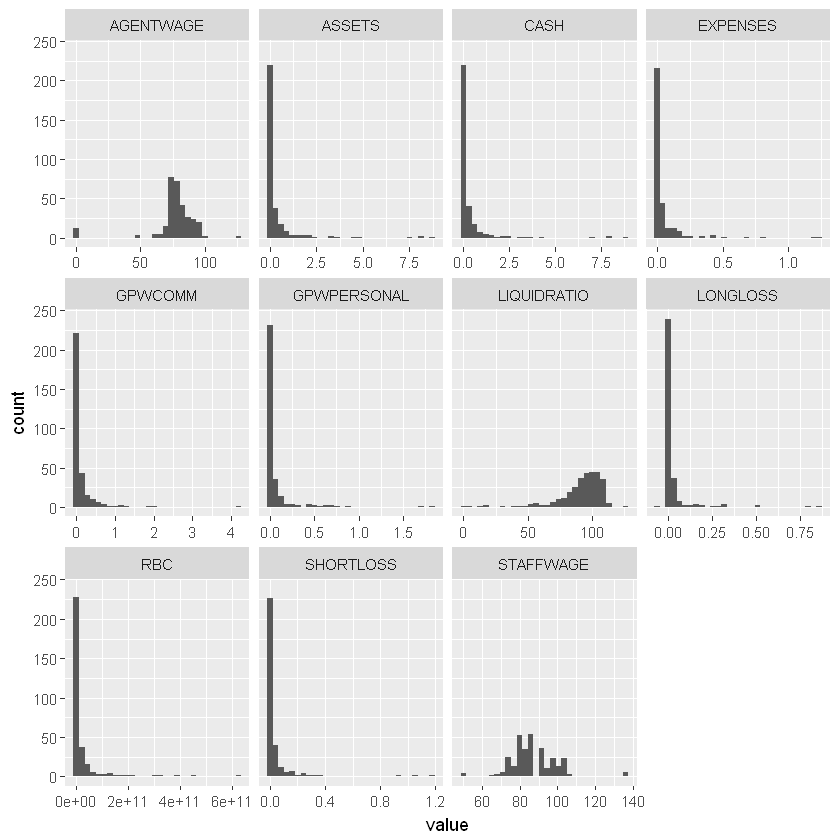

In [214]:
NAICData %>% tidyr::gather(RBC:LIQUIDRATIO, key = "variable", value = "value") %>%
  ggplot(aes(x = value)) + 
  geom_histogram(bins = 30) + facet_wrap(~ variable, scales = 'free_x')

<a id="step4"></a>
### Step 4: Scatterplot & Correlation Plot

+ Scatter plot & Correlation matrix was generated for the quantitative variables
+ Correlation matrix shows a very strong relationship of EXPENSES with fields LONGLOSS, SHORTLOSS,GPWPERSONAL, GPWCOMM, ASSETS, CASH & a considerable relationship with RBC
+ STAFFWAGE & LIQUIDRATIO have no direct relationship, the same is shown in Summary as well

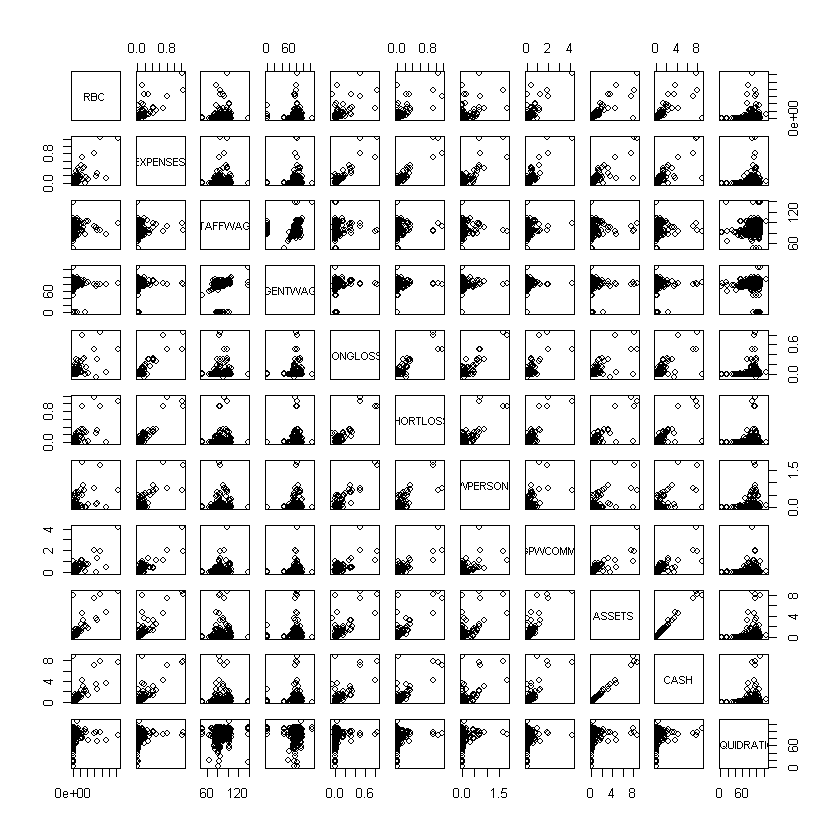

In [215]:
plot(NAICData[,Quant_colnames])

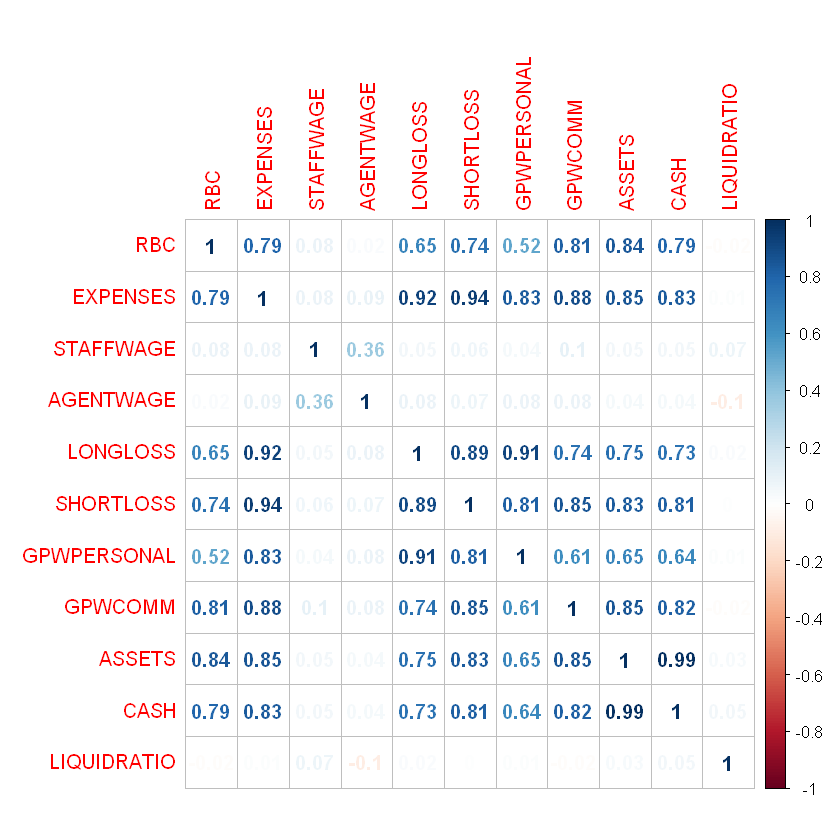

In [216]:
corrplot(round(cor(NAICData[,Quant_colnames]),2), method = "number")

<a id="step5"></a>
### Step 5 - Transforming Categorical variables

+ All of the qualitative variables are already holding values '0' or '1' like dummy variables, hence performing NO transformation

In [217]:
summary(NAICData$GROUP)
summary(NAICData$MUTUAL)
summary(NAICData$STOCK)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.6059  1.0000  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2215  0.0000  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.6417  1.0000  1.0000 

<a id="step6"></a>
### Step 6 - First Linear Regression (on all variables)

+ Difference between R2 and Adjusted-R2 is very less, so there is no issue with the model
+ There are some regressors with negative sign (ASSETS, STAFFWAGE, LIQUIDRATIO, MUTUAL, STOCK), which have a negative coefficient
+ ASSETS field which seems to have direct correlation, has sign in negative which means there might be collinearity, which could be found out in the next steps

In [218]:
model1 <- lm(EXPENSES~.,data=NAICData[,-c(12)])
summary(model1)


Call:
lm(formula = EXPENSES ~ ., data = NAICData[, -c(12)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.165705 -0.004105 -0.000122  0.004617  0.131861 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.548e-03  1.493e-02   0.305 0.760952    
RBC          5.861e-13  8.099e-14   7.238 4.03e-12 ***
STAFFWAGE   -9.491e-05  1.472e-04  -0.645 0.519495    
AGENTWAGE    1.311e-04  9.773e-05   1.342 0.180702    
LONGLOSS     5.047e-01  5.682e-02   8.882  < 2e-16 ***
SHORTLOSS    2.437e-01  3.697e-02   6.592 2.02e-10 ***
GPWPERSONAL  7.257e-02  2.138e-02   3.394 0.000783 ***
GPWCOMM      1.204e-01  1.166e-02  10.322  < 2e-16 ***
ASSETS      -1.828e-01  3.137e-02  -5.829 1.47e-08 ***
CASH         1.708e-01  2.835e-02   6.025 5.06e-09 ***
LIQUIDRATIO -3.264e-05  9.597e-05  -0.340 0.734030    
GROUP        6.183e-04  3.760e-03   0.164 0.869506    
MUTUAL      -1.551e-03  5.644e-03  -0.275 0.783602    
STOCK       -5.596e-03  5.159e-03  -1.08

<a id="step7"></a>
### Step 7 - Residual Plots

+ From the 'Fitted Vs Residual plot' it could be observed that model leaves behind a considerable amount of residues
+ It could also be obsevered that the residuals of the key variables (from ANOVA), still have residuals left behind

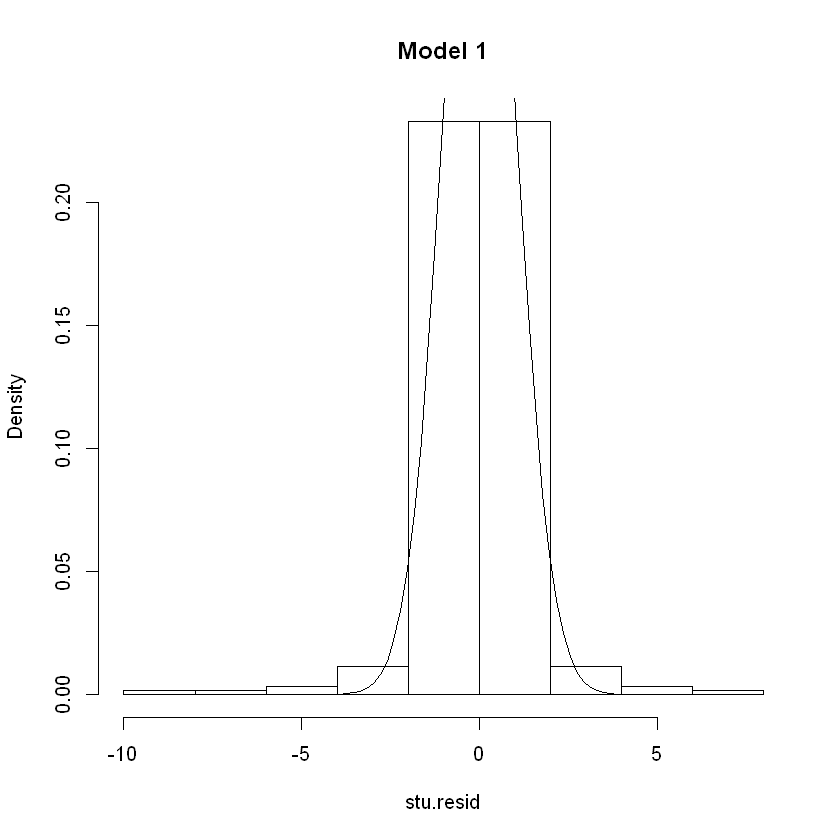

In [219]:
StudentResidualPlot(model1,"Model 1")

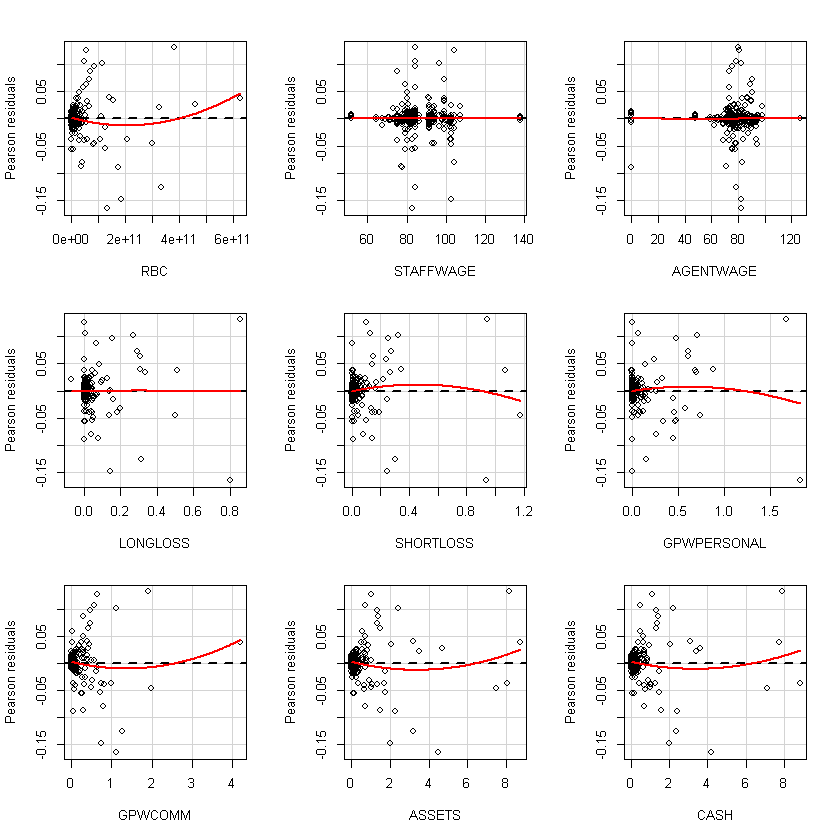

,Test stat,Pr(>|t|)
RBC,2.970,0.003
STAFFWAGE,0.008,0.994
AGENTWAGE,0.218,0.828
LONGLOSS,-0.017,0.986
SHORTLOSS,-1.823,0.069
GPWPERSONAL,-1.843,0.066
GPWCOMM,2.581,0.010
ASSETS,2.867,0.004
CASH,2.636,0.009
LIQUIDRATIO,-0.996,0.320


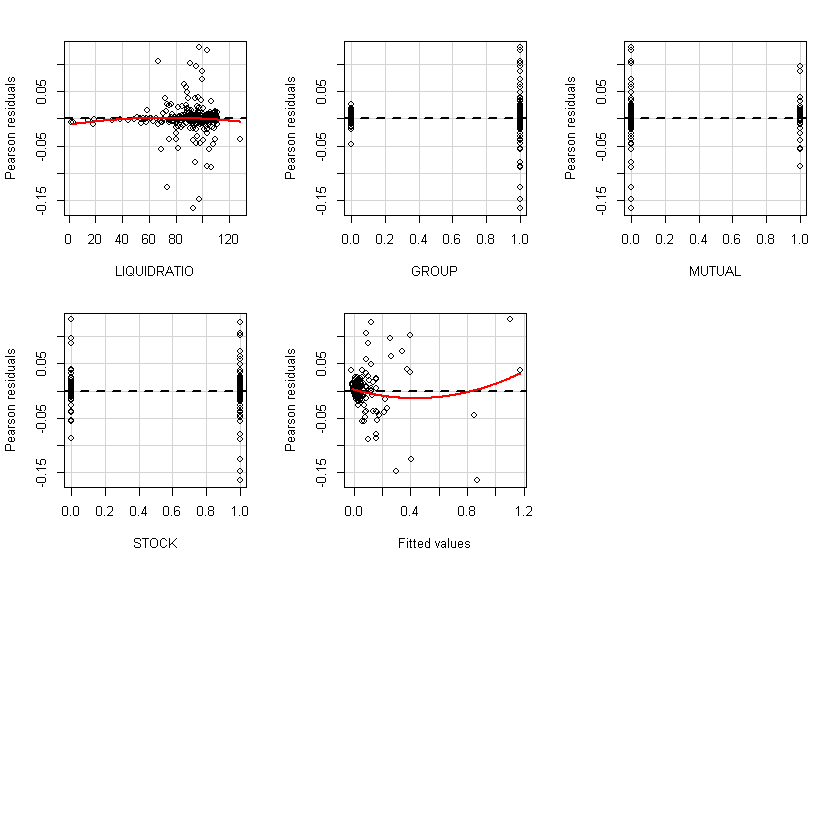

In [220]:
residualPlots(model1)

<a id="step8"></a>
### Step 8 - Influential  Observations

Below are influential observations

+ 175 - High influencers
+ 245, 248 - Medium influencers
+ 194, 202, 209 - Low influencers

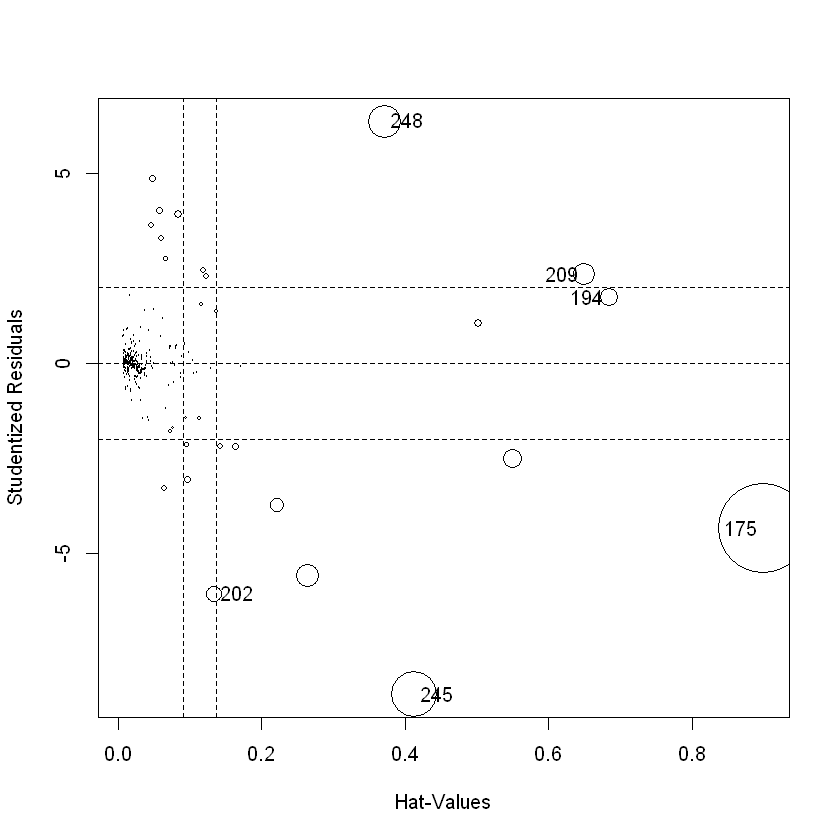

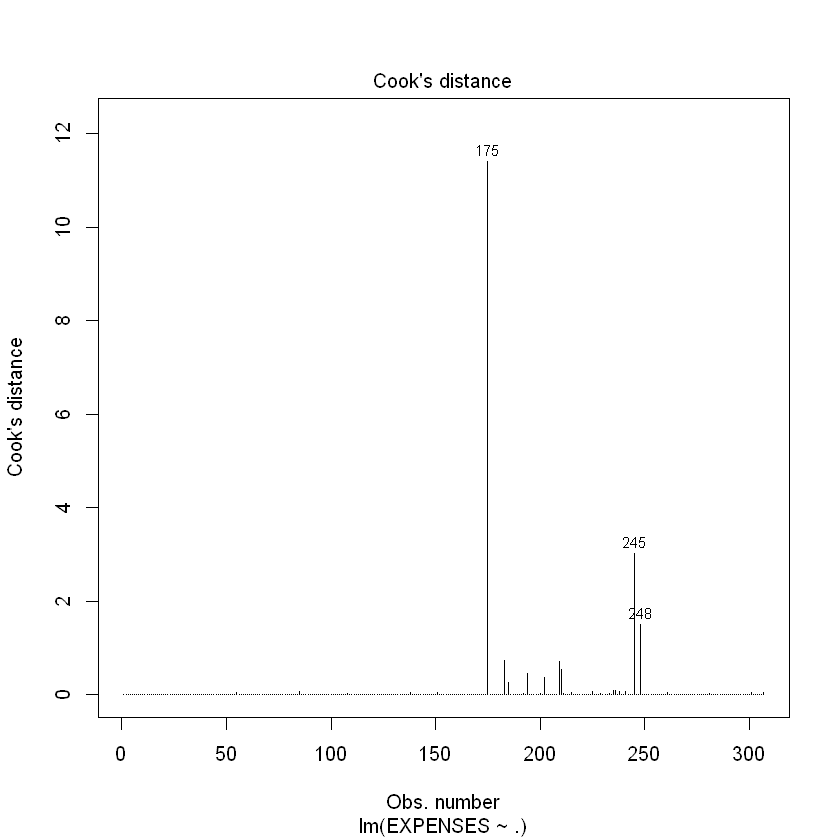

In [221]:
DeletionDiagonsitics(model1)

In [222]:
NAICData2 <- NAICData[-c(175,245,248,194,202,209),]

In [223]:
model1 <- lm(EXPENSES~.,data=NAICData2[,-c(12)])
summary(model1)


Call:
lm(formula = EXPENSES ~ ., data = NAICData2[, -c(12)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.091253 -0.004548 -0.001207  0.002035  0.136699 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.516e-04  1.208e-02  -0.037 0.970207    
RBC          4.439e-13  1.082e-13   4.101 5.36e-05 ***
STAFFWAGE   -2.425e-05  1.184e-04  -0.205 0.837825    
AGENTWAGE    1.113e-04  7.876e-05   1.413 0.158726    
LONGLOSS     5.676e-01  4.985e-02  11.386  < 2e-16 ***
SHORTLOSS    3.313e-01  4.636e-02   7.146 7.39e-12 ***
GPWPERSONAL  7.051e-02  1.796e-02   3.927 0.000108 ***
GPWCOMM      9.755e-02  1.474e-02   6.617 1.79e-10 ***
ASSETS      -2.033e-01  3.878e-02  -5.244 3.06e-07 ***
CASH         1.897e-01  3.333e-02   5.691 3.12e-08 ***
LIQUIDRATIO -5.753e-05  7.795e-05  -0.738 0.461136    
GROUP        1.914e-03  3.068e-03   0.624 0.533277    
MUTUAL       1.379e-03  4.564e-03   0.302 0.762713    
STOCK       -4.150e-04  4.185e-03  -0.0

<a id="step9"></a>
### Step 9 - Multi-Collinearity

+ It could be observed that ASSETS and CASH are having a collinear relationship, from the initial model (call it **'model1'**)
+ Removed of the ASSETS field, and Variance decomposition, VIF reduced considerably, a new model removing these two variables (say **'model1corr'**)
+  from the above model, it was observed that there is a collinear relationship between LONGLOSS and SHORTLOSS. Hence removed the LONGLOSS and ran the VIF, which reduced the VIF i.e. VIFs of all variables fell below 7
+ VDTs still show a variance that accumulates upto 28
+ Generated Multiple models, removing the collinear variables to check the collinearity

In [224]:
vif(model1)

RBC   STAFFWAGE   AGENTWAGE    LONGLOSS   SHORTLOSS GPWPERSONAL 
  11.970269    1.216446    1.217101    4.923703    9.631096    3.207580 
    GPWCOMM      ASSETS        CASH LIQUIDRATIO       GROUP      MUTUAL 
   5.443500  376.576621  242.621141    1.143976    1.367179    2.200897 
      STOCK 
   2.444277

In [225]:
#stepAIC
colldiag(model1)

Condition
Index	Variance Decomposition Proportions
           intercept RBC   STAFFWAGE AGENTWAGE LONGLOSS SHORTLOSS GPWPERSONAL
1    1.000 0.000     0.001 0.000     0.000     0.002    0.001     0.002      
2    1.569 0.000     0.001 0.000     0.001     0.004    0.002     0.004      
3    2.776 0.000     0.000 0.000     0.000     0.000    0.000     0.004      
4    3.750 0.000     0.029 0.000     0.000     0.057    0.000     0.217      
5    5.107 0.001     0.001 0.001     0.005     0.023    0.006     0.006      
6    5.799 0.000     0.050 0.000     0.000     0.005    0.034     0.166      
7    6.731 0.000     0.081 0.000     0.001     0.061    0.221     0.015      
8    7.938 0.000     0.001 0.000     0.001     0.812    0.001     0.557      
9    8.829 0.002     0.002 0.006     0.035     0.003    0.000     0.000      
10  12.517 0.001     0.185 0.000     0.217     0.001    0.268     0.002      
11  14.220 0.005     0.223 0.000     0.256     0.006    0.378     0.021      
12  21.277 0.

In [226]:
model1coll <- lm(EXPENSES~.,data=NAICData2[,-c(9,12)])
summary(model1coll)


Call:
lm(formula = EXPENSES ~ ., data = NAICData2[, -c(9, 12)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.112981 -0.005262 -0.002225  0.002229  0.160469 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.187e-02  1.242e-02  -0.956   0.3398    
RBC          4.847e-14  8.114e-14   0.597   0.5507    
STAFFWAGE    3.507e-05  1.231e-04   0.285   0.7760    
AGENTWAGE    9.758e-05  8.226e-05   1.186   0.2365    
LONGLOSS     5.282e-01  5.150e-02  10.257  < 2e-16 ***
SHORTLOSS    2.481e-01  4.552e-02   5.450 1.08e-07 ***
GPWPERSONAL  7.677e-02  1.872e-02   4.101 5.36e-05 ***
GPWCOMM      5.642e-02  1.304e-02   4.326 2.10e-05 ***
CASH         2.032e-02  8.598e-03   2.363   0.0188 *  
LIQUIDRATIO  3.483e-05  7.935e-05   0.439   0.6610    
GROUP        2.482e-03  3.204e-03   0.774   0.4393    
MUTUAL       5.726e-04  4.767e-03   0.120   0.9045    
STOCK       -5.633e-04  4.374e-03  -0.129   0.8976    
---
Signif. codes:  0 '***' 0.001 '*

In [227]:
vif(model1coll)
colldiag(model1coll)

RBC   STAFFWAGE   AGENTWAGE    LONGLOSS   SHORTLOSS GPWPERSONAL 
   6.159397    1.205336    1.215760    4.812255    8.502235    3.193401 
    GPWCOMM        CASH LIQUIDRATIO       GROUP      MUTUAL       STOCK 
   3.902914   14.787956    1.085569    1.365476    2.198396    2.444165

Condition
Index	Variance Decomposition Proportions
           intercept RBC   STAFFWAGE AGENTWAGE LONGLOSS SHORTLOSS GPWPERSONAL
1    1.000 0.000     0.001 0.000     0.001     0.002    0.001     0.002      
2    1.580 0.000     0.004 0.000     0.001     0.007    0.004     0.007      
3    2.663 0.000     0.001 0.000     0.000     0.000    0.000     0.004      
4    3.724 0.000     0.078 0.000     0.000     0.050    0.000     0.225      
5    4.901 0.001     0.002 0.001     0.005     0.024    0.007     0.008      
6    5.629 0.000     0.157 0.000     0.000     0.003    0.044     0.157      
7    6.564 0.000     0.088 0.000     0.001     0.063    0.280     0.012      
8    7.618 0.000     0.001 0.000     0.001     0.838    0.002     0.559      
9    8.474 0.002     0.002 0.006     0.035     0.004    0.001     0.000      
10  12.254 0.002     0.151 0.000     0.328     0.000    0.123     0.000      
11  14.651 0.005     0.499 0.000     0.154     0.005    0.525     0.025      
12  20.434 0.

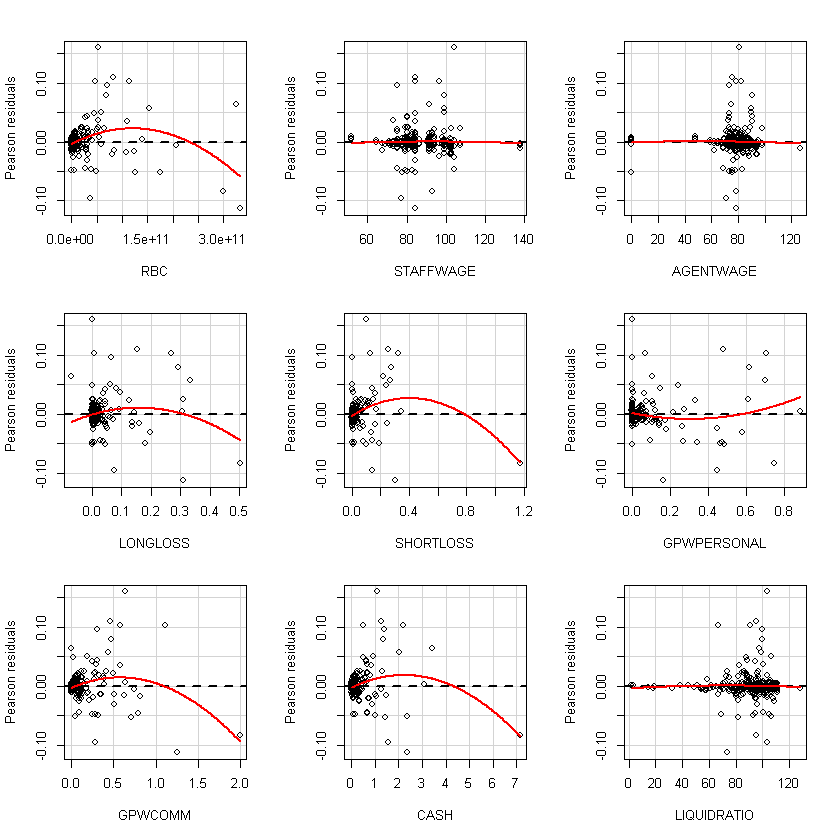

,Test stat,Pr(>|t|)
RBC,-7.801,0.000
STAFFWAGE,-0.358,0.721
AGENTWAGE,-0.469,0.640
LONGLOSS,-3.993,0.000
SHORTLOSS,-8.400,0.000
GPWPERSONAL,2.802,0.005
GPWCOMM,-8.901,0.000
CASH,-8.717,0.000
LIQUIDRATIO,-0.444,0.658
GROUP,0.315,0.753


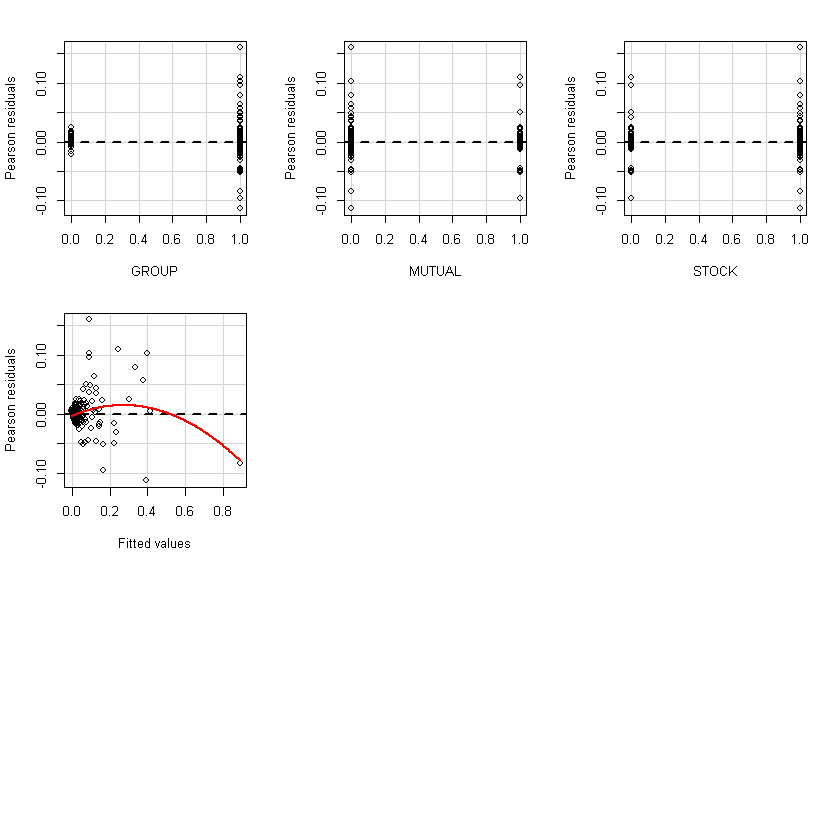

In [228]:
residualPlots(model1coll)

In [229]:
model2 <- lm(EXPENSES~.,data=NAICData[,-c(5,9,12)])
summary(model2)


Call:
lm(formula = EXPENSES ~ ., data = NAICData[, -c(5, 9, 12)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.172269 -0.005017  0.000494  0.005708  0.206676 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.304e-02  1.708e-02  -0.764   0.4458    
RBC          2.435e-13  5.421e-14   4.492 1.02e-05 ***
STAFFWAGE    2.002e-05  1.693e-04   0.118   0.9060    
AGENTWAGE    9.717e-05  1.128e-04   0.861   0.3899    
SHORTLOSS    3.594e-01  3.947e-02   9.107  < 2e-16 ***
GPWPERSONAL  1.975e-01  1.740e-02  11.347  < 2e-16 ***
GPWCOMM      1.099e-01  1.302e-02   8.437 1.48e-15 ***
CASH         6.131e-03  3.658e-03   1.676   0.0948 .  
LIQUIDRATIO  1.383e-04  1.085e-04   1.275   0.2034    
GROUP       -2.251e-03  4.341e-03  -0.519   0.6044    
MUTUAL      -9.961e-03  6.481e-03  -1.537   0.1254    
STOCK       -9.397e-03  5.972e-03  -1.573   0.1167    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard err

In [230]:
vif(model2)
colldiag(model2)

RBC   STAFFWAGE   AGENTWAGE   SHORTLOSS GPWPERSONAL     GPWCOMM 
   3.500321    1.200439    1.193029    7.456398    3.221469    5.631096 
       CASH LIQUIDRATIO       GROUP      MUTUAL       STOCK 
   4.155430    1.062382    1.321538    2.126948    2.408216

Condition
Index	Variance Decomposition Proportions
           intercept RBC   STAFFWAGE AGENTWAGE SHORTLOSS GPWPERSONAL GPWCOMM
1    1.000 0.000     0.002 0.000     0.001     0.001     0.002       0.002  
2    1.521 0.000     0.011 0.000     0.001     0.007     0.010       0.007  
3    2.543 0.000     0.000 0.000     0.000     0.000     0.004       0.000  
4    3.685 0.000     0.127 0.000     0.000     0.011     0.338       0.020  
5    4.770 0.001     0.002 0.002     0.006     0.007     0.001       0.000  
6    6.207 0.000     0.034 0.000     0.000     0.060     0.003       0.165  
7    6.271 0.000     0.811 0.000     0.000     0.033     0.160       0.243  
8    8.032 0.002     0.000 0.006     0.037     0.013     0.002       0.021  
9    9.102 0.000     0.001 0.000     0.001     0.860     0.471       0.495  
10  12.105 0.004     0.001 0.000     0.466     0.008     0.009       0.044  
11  19.535 0.072     0.008 0.372     0.486     0.000     0.001       0.001  
12  28.755 0.920     0.00

In [231]:
model2corr <- lm(EXPENSES~.,data=NAICData[,-c(3,5,9,12)])
summary(model2corr)


Call:
lm(formula = EXPENSES ~ ., data = NAICData[, -c(3, 5, 9, 12)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.172311 -0.004934  0.000505  0.005708  0.206638 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.186e-02  1.382e-02  -0.858    0.391    
RBC          2.437e-13  5.408e-14   4.507 9.49e-06 ***
AGENTWAGE    1.021e-04  1.048e-04   0.974    0.331    
SHORTLOSS    3.594e-01  3.940e-02   9.121  < 2e-16 ***
GPWPERSONAL  1.974e-01  1.737e-02  11.366  < 2e-16 ***
GPWCOMM      1.099e-01  1.298e-02   8.470 1.16e-15 ***
CASH         6.109e-03  3.647e-03   1.675    0.095 .  
LIQUIDRATIO  1.399e-04  1.074e-04   1.303    0.194    
GROUP       -2.203e-03  4.315e-03  -0.511    0.610    
MUTUAL      -9.994e-03  6.465e-03  -1.546    0.123    
STOCK       -9.388e-03  5.962e-03  -1.575    0.116    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03228 on 296 degrees of freedom
Multiple R-squ

In [232]:
vif(model2corr)

RBC   AGENTWAGE   SHORTLOSS GPWPERSONAL     GPWCOMM        CASH 
   3.495352    1.032620    7.455639    3.219625    5.614406    4.144180 
LIQUIDRATIO       GROUP      MUTUAL       STOCK 
   1.045147    1.309751    2.123127    2.407776

In [233]:
colldiag(model2corr)

Condition
Index	Variance Decomposition Proportions
           intercept RBC   AGENTWAGE SHORTLOSS GPWPERSONAL GPWCOMM CASH 
1    1.000 0.000     0.004 0.001     0.002     0.004       0.003   0.003
2    1.490 0.001     0.010 0.002     0.006     0.009       0.007   0.010
3    2.396 0.000     0.000 0.000     0.000     0.004       0.000   0.000
4    3.472 0.000     0.127 0.000     0.011     0.339       0.020   0.016
5    4.580 0.003     0.003 0.010     0.007     0.000       0.000   0.001
6    5.847 0.000     0.030 0.000     0.061     0.004       0.170   0.864
7    5.909 0.000     0.817 0.000     0.032     0.159       0.239   0.071
8    7.735 0.006     0.000 0.068     0.017     0.003       0.026   0.007
9    8.576 0.000     0.001 0.001     0.856     0.470       0.492   0.000
10  11.403 0.006     0.001 0.543     0.008     0.009       0.044   0.022
11  22.078 0.983     0.007 0.374     0.000     0.000       0.000   0.007
   LIQUIDRATIO GROUP MUTUAL STOCK
1  0.001       0.005 0.001  0.002
2  0.

In [234]:
model3 <- lm(EXPENSES~.,data=NAICData2[,-c(3,5,9,11,12)])
summary(model3)


Call:
lm(formula = EXPENSES ~ ., data = NAICData2[, -c(3, 5, 9, 11, 
    12)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.126173 -0.004611 -0.001841  0.003183  0.131758 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.497e-03  7.953e-03  -0.817   0.4146    
RBC          7.497e-14  9.379e-14   0.799   0.4247    
AGENTWAGE    1.287e-04  8.850e-05   1.455   0.1468    
SHORTLOSS    3.404e-01  5.143e-02   6.619 1.74e-10 ***
GPWPERSONAL  1.898e-01  1.760e-02  10.784  < 2e-16 ***
GPWCOMM      8.537e-02  1.476e-02   5.785 1.88e-08 ***
CASH         2.270e-02  9.851e-03   2.304   0.0219 *  
GROUP       -1.381e-03  3.691e-03  -0.374   0.7085    
MUTUAL      -3.190e-03  5.480e-03  -0.582   0.5610    
STOCK       -2.301e-04  5.057e-03  -0.045   0.9637    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02716 on 291 degrees of freedom
Multiple R-squared:  0.8963,	Adjusted R-squared:  0.8931 
F

In [235]:
vif(model3)

RBC   AGENTWAGE   SHORTLOSS GPWPERSONAL     GPWCOMM        CASH 
   6.069440    1.038094    8.004822    2.080563    3.684580   14.316041 
      GROUP      MUTUAL       STOCK 
   1.336066    2.142767    2.410558

In [236]:
colldiag(model3)

Condition
Index	Variance Decomposition Proportions
           intercept RBC   AGENTWAGE SHORTLOSS GPWPERSONAL GPWCOMM CASH  GROUP
1    1.000 0.001     0.003 0.001     0.002     0.007       0.005   0.001 0.006
2    1.619 0.003     0.006 0.004     0.006     0.010       0.006   0.003 0.012
3    2.312 0.000     0.001 0.000     0.000     0.006       0.000   0.000 0.007
4    3.466 0.000     0.077 0.000     0.001     0.612       0.004   0.004 0.009
5    4.552 0.011     0.012 0.020     0.026     0.001       0.002   0.000 0.761
6    4.896 0.001     0.168 0.000     0.051     0.188       0.445   0.012 0.011
7    5.766 0.000     0.069 0.002     0.252     0.154       0.426   0.035 0.101
8    7.587 0.021     0.000 0.112     0.001     0.001       0.005   0.001 0.087
9   12.044 0.013     0.655 0.013     0.636     0.012       0.102   0.898 0.007
10  15.497 0.950     0.009 0.848     0.025     0.008       0.004   0.045 0.000
   MUTUAL STOCK
1  0.002  0.002
2  0.005  0.009
3  0.257  0.030
4  0.010  0.000


<a id="step10"></a>
### Step 10: Heteroscadasticity Test

+ From the residual plots for Model 3, from the above, it could be observed that no Hetereoscadasticity is present
+ Also the tests have a p-value less than 0.05, and hence the tests also confirm the same

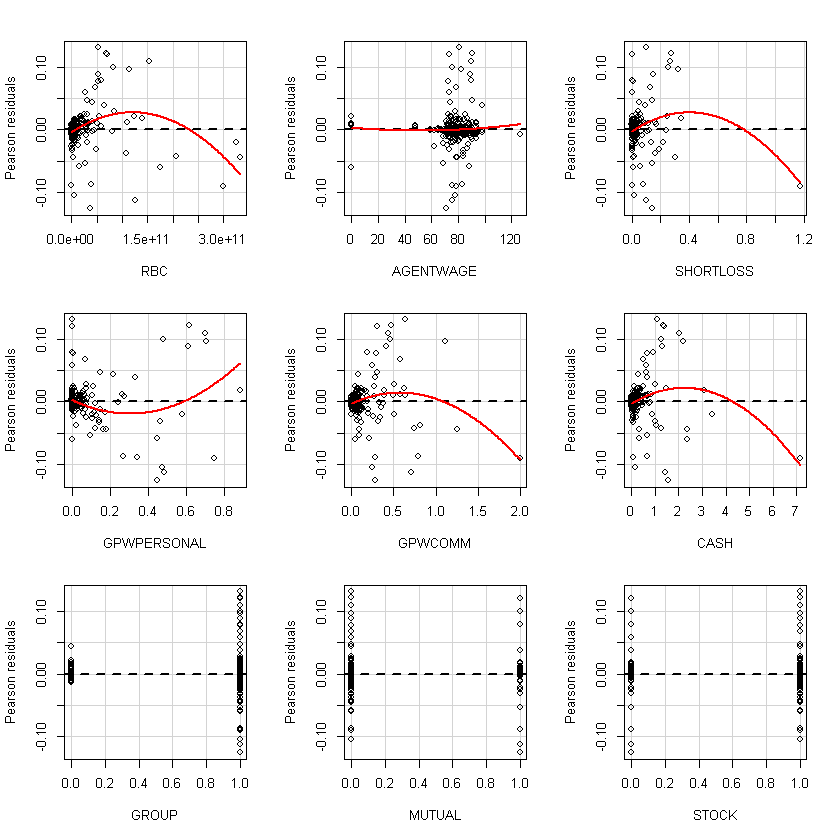

,Test stat,Pr(>|t|)
RBC,-8.081,0.000
AGENTWAGE,0.789,0.431
SHORTLOSS,-7.208,0.000
GPWPERSONAL,5.158,0.000
GPWCOMM,-7.256,0.000
CASH,-8.824,0.000
GROUP,-0.040,0.968
MUTUAL,0.760,0.448
STOCK,0.003,0.997
Tukey test,-5.637,0.000


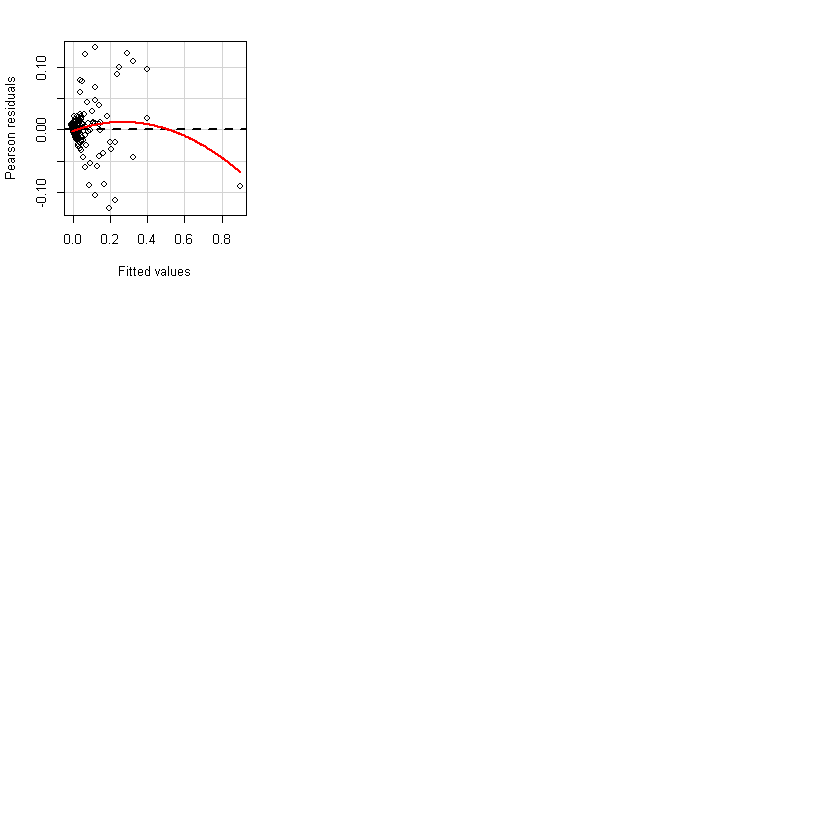

In [237]:
residualPlots(model3)

In [238]:
lmtest::bptest(model3)


	studentized Breusch-Pagan test

data:  model3
BP = 163.46, df = 9, p-value < 2.2e-16


In [239]:
car::ncvTest(model3) 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 617.9809    Df = 1     p = 2.055407e-136 

<a id="step11"></a>
### Step 11: Normality of Response Variable & Transformation

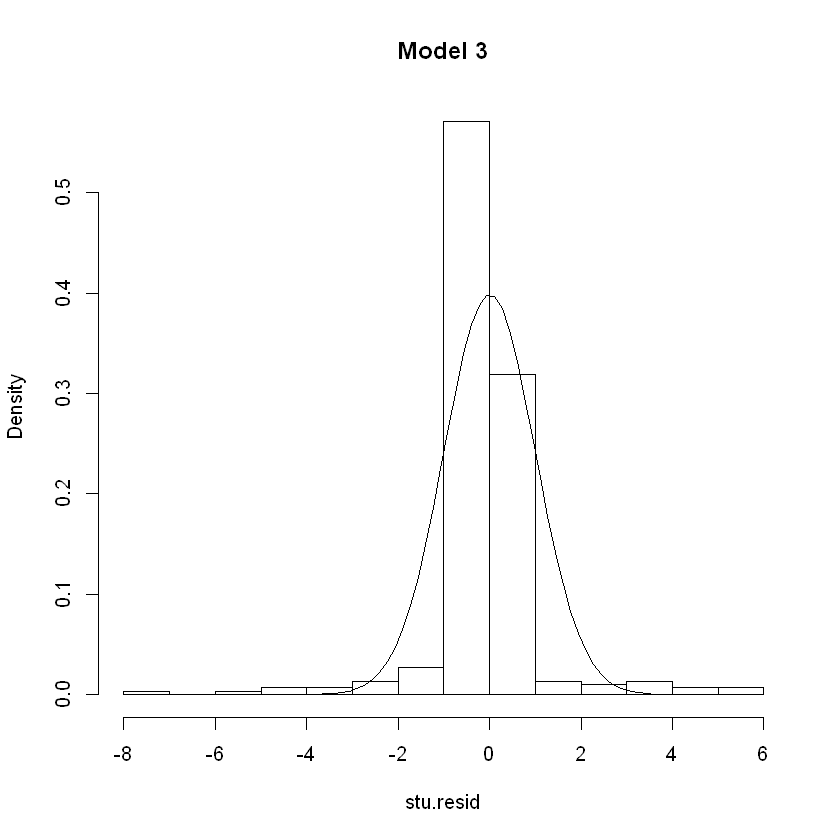

In [300]:
StudentResidualPlot(model3, "Model 3")

In [240]:
NAICData2$EXPENSES2 <- NAICData2$EXPENSES^2

In [241]:
NAICData2$RBC2 <- NAICData2$RBC^2
NAICData2$SHORTLOSS2 <- NAICData2$SHORTLOSS^2
NAICData2$GPWPERSONAL2 <- NAICData2$GPWPERSONAL^2
NAICData2$CASH2 <- NAICData2$CASH^2
NAICData2$GPWCOMM2 <- NAICData2$GPWCOMM^2

In [242]:
names(NAICData2)

[1] "RBC"          "EXPENSES"     "STAFFWAGE"    "AGENTWAGE"    "LONGLOSS"    
 [6] "SHORTLOSS"    "GPWPERSONAL"  "GPWCOMM"      "ASSETS"       "CASH"        
[11] "LIQUIDRATIO"  "COMPANY_NAME" "GROUP"        "MUTUAL"       "STOCK"       
[16] "EXPENSES2"    "RBC2"         "SHORTLOSS2"   "GPWPERSONAL2" "CASH2"       
[21] "GPWCOMM2"

In [243]:
model3corr <- lm(EXPENSES2~.,data=NAICData2[,-c(2,3,5,9,11,12,18,19)])
summary(model3corr)


Call:
lm(formula = EXPENSES2 ~ ., data = NAICData2[, -c(2, 3, 5, 9, 
    11, 12, 18, 19)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.065764 -0.001317  0.000188  0.003063  0.076805 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.905e-03  3.532e-03  -0.823   0.4114    
RBC          6.734e-14  9.778e-14   0.689   0.4916    
AGENTWAGE    4.206e-05  3.929e-05   1.071   0.2852    
SHORTLOSS    1.692e-01  2.655e-02   6.371 7.44e-10 ***
GPWPERSONAL  7.220e-02  9.065e-03   7.965 3.86e-14 ***
GPWCOMM     -6.760e-02  1.603e-02  -4.218 3.30e-05 ***
CASH         1.619e-02  7.671e-03   2.110   0.0357 *  
GROUP       -2.788e-03  1.669e-03  -1.670   0.0960 .  
MUTUAL      -4.100e-03  2.433e-03  -1.685   0.0930 .  
STOCK       -1.744e-04  2.230e-03  -0.078   0.9377    
RBC2        -1.084e-24  2.438e-25  -4.445 1.26e-05 ***
CASH2        2.465e-03  1.308e-03   1.884   0.0605 .  
GPWCOMM2     9.480e-02  1.507e-02   6.291 1.17e-09 ***
---
Signi

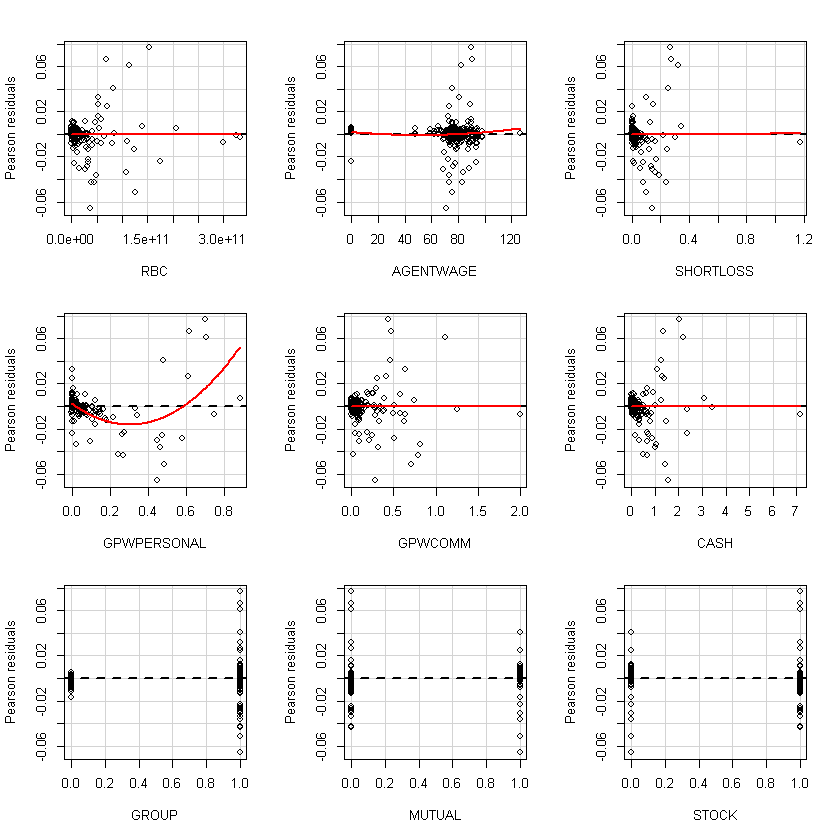

,Test stat,Pr(>|t|)
RBC,0.588,0.557
AGENTWAGE,1.053,0.293
SHORTLOSS,0.715,0.475
GPWPERSONAL,11.562,0.000
GPWCOMM,-0.095,0.924
CASH,1.007,0.315
GROUP,-0.596,0.552
MUTUAL,0.564,0.573
STOCK,0.059,0.953
RBC2,-2.840,0.005


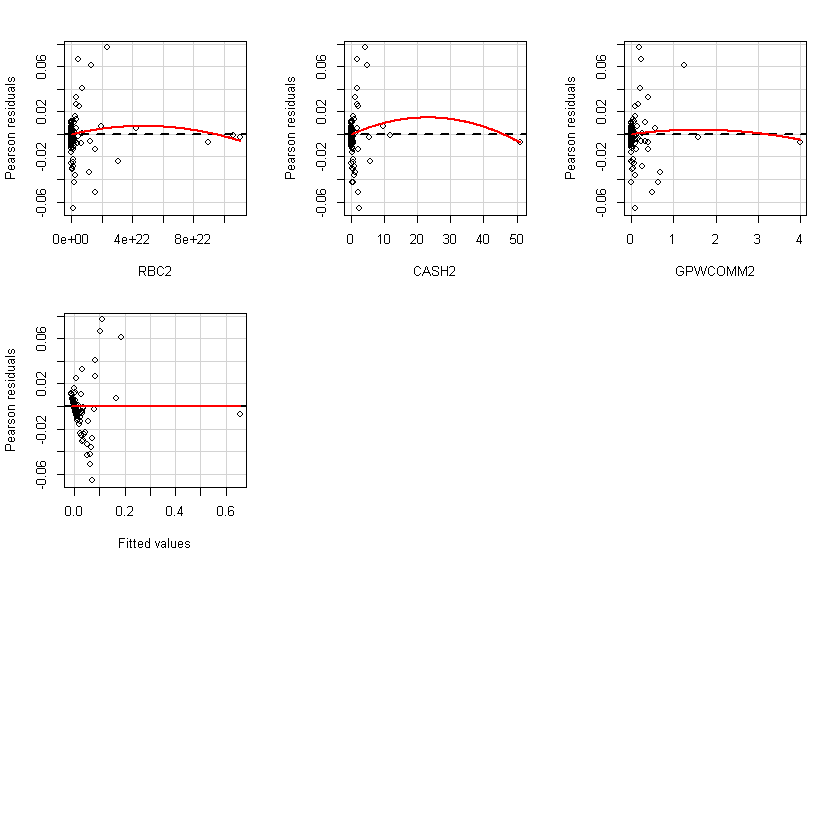

In [244]:
residualPlots(model3corr)

In [245]:
model4 <- lm(EXPENSES2~.,data=NAICData2[,-c(2,3,5,9,11,12,18,7,22)])
summary(model4)


Call:
lm(formula = EXPENSES2 ~ ., data = NAICData2[, -c(2, 3, 5, 9, 
    11, 12, 18, 7, 22)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.053950 -0.001052  0.000087  0.001985  0.058481 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.406e-03  3.060e-03  -0.786  0.43246    
RBC           1.662e-13  8.514e-14   1.952  0.05196 .  
AGENTWAGE     3.830e-05  3.404e-05   1.125  0.26140    
SHORTLOSS     1.572e-01  2.236e-02   7.031 1.49e-11 ***
GPWCOMM      -6.147e-02  1.388e-02  -4.429 1.34e-05 ***
CASH          1.074e-03  6.806e-03   0.158  0.87467    
GROUP        -1.226e-03  1.448e-03  -0.846  0.39807    
MUTUAL       -2.866e-03  2.109e-03  -1.359  0.17516    
STOCK         2.866e-04  1.932e-03   0.148  0.88222    
RBC2         -1.010e-24  2.110e-25  -4.789 2.69e-06 ***
GPWPERSONAL2  1.669e-01  1.244e-02  13.417  < 2e-16 ***
CASH2         3.113e-03  1.126e-03   2.766  0.00605 ** 
GPWCOMM2      9.311e-02  1.305e-02   7.137 7.78e

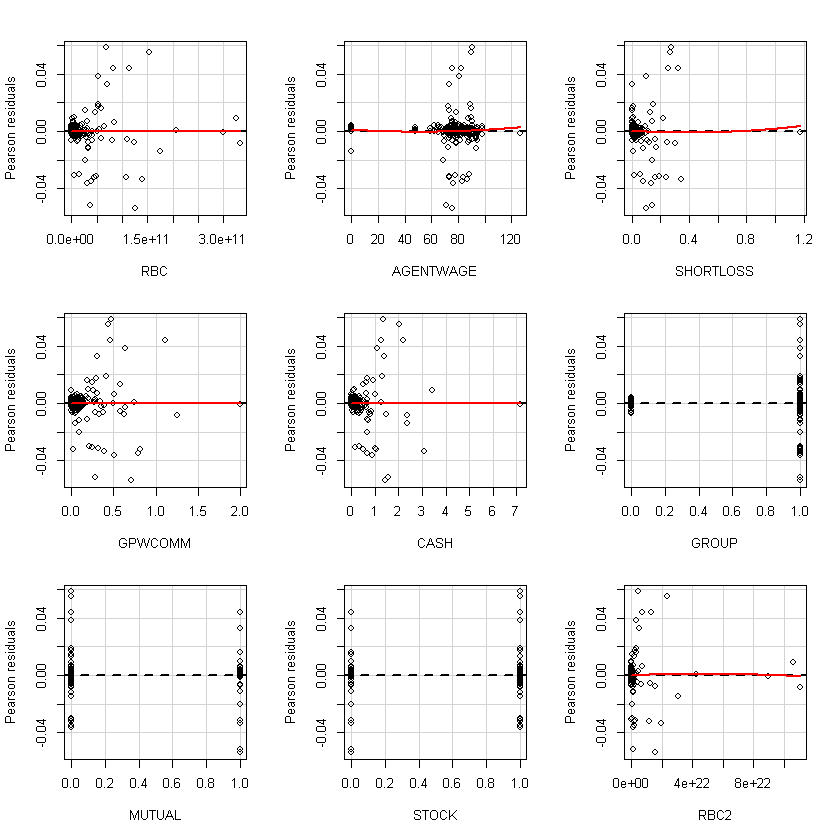

,Test stat,Pr(>|t|)
RBC,-2.190,0.029
AGENTWAGE,0.641,0.522
SHORTLOSS,3.442,0.001
GPWCOMM,1.783,0.076
CASH,-0.718,0.473
GROUP,-0.066,0.947
MUTUAL,0.397,0.692
STOCK,0.122,0.903
RBC2,-0.429,0.668
GPWPERSONAL2,1.239,0.216


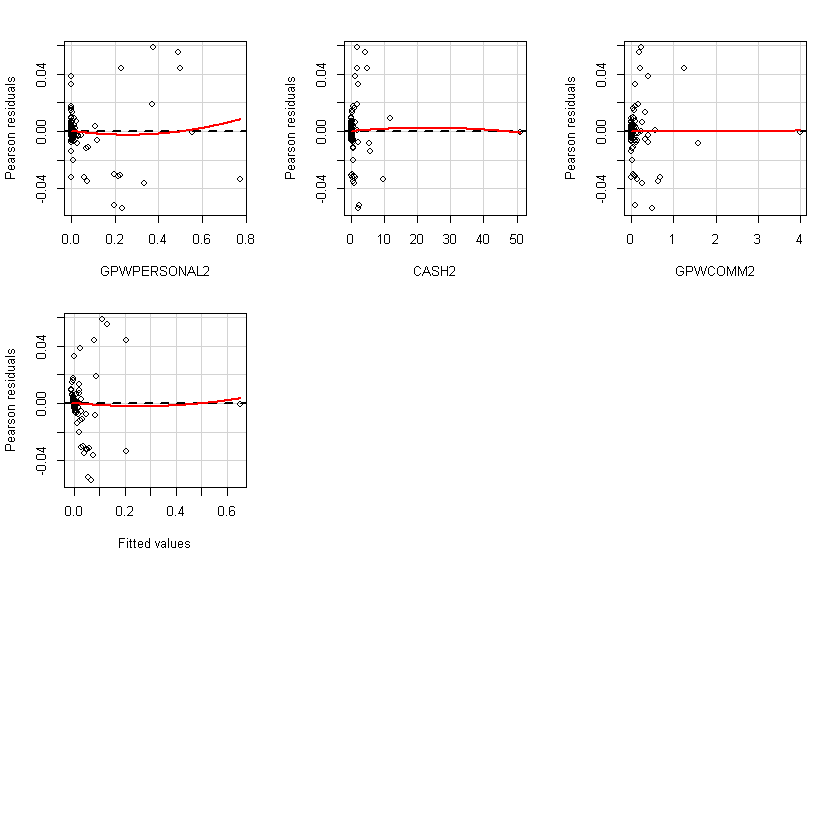

In [246]:
residualPlots(model4)

In [268]:
stepAIC(model4)

Start:  AIC=-2737.95
EXPENSES2 ~ RBC + AGENTWAGE + SHORTLOSS + GPWCOMM + CASH + GROUP + 
    MUTUAL + STOCK + RBC2 + GPWPERSONAL2 + CASH2 + GPWCOMM2

               Df Sum of Sq      RSS     AIC
- STOCK         1 0.0000024 0.030950 -2739.9
- CASH          1 0.0000027 0.030951 -2739.9
- GROUP         1 0.0000770 0.031025 -2739.2
- AGENTWAGE     1 0.0001361 0.031084 -2738.6
- MUTUAL        1 0.0001985 0.031146 -2738.0
<none>                      0.030948 -2737.9
- RBC           1 0.0004093 0.031357 -2736.0
- CASH2         1 0.0008220 0.031770 -2732.1
- GPWCOMM       1 0.0021082 0.033056 -2720.1
- RBC2          1 0.0024641 0.033412 -2716.9
- SHORTLOSS     1 0.0053126 0.036261 -2692.3
- GPWCOMM2      1 0.0054735 0.036421 -2690.9
- GPWPERSONAL2  1 0.0193453 0.050293 -2593.8

Step:  AIC=-2739.93
EXPENSES2 ~ RBC + AGENTWAGE + SHORTLOSS + GPWCOMM + CASH + GROUP + 
    MUTUAL + RBC2 + GPWPERSONAL2 + CASH2 + GPWCOMM2

               Df Sum of Sq      RSS     AIC
- CASH          1 0.0000026 0.030


Call:
lm(formula = EXPENSES2 ~ RBC + SHORTLOSS + GPWCOMM + MUTUAL + 
    RBC2 + GPWPERSONAL2 + CASH2 + GPWCOMM2, data = NAICData2[, 
    -c(2, 3, 5, 9, 11, 12, 18, 7, 22)])

Coefficients:
 (Intercept)           RBC     SHORTLOSS       GPWCOMM        MUTUAL  
   6.500e-05     1.671e-13     1.587e-01    -6.151e-02    -2.739e-03  
        RBC2  GPWPERSONAL2         CASH2      GPWCOMM2  
  -9.990e-25     1.684e-01     3.172e-03     9.326e-02  


In [270]:
model4a <- lm(formula = EXPENSES2 ~ RBC + SHORTLOSS + GPWCOMM + MUTUAL + 
    RBC2 + GPWPERSONAL2 + CASH2 + GPWCOMM2, data = NAICData2[, 
    -c(2, 3, 5, 9, 11, 12, 18, 7, 22)])
summary(model4a)


Call:
lm(formula = EXPENSES2 ~ RBC + SHORTLOSS + GPWCOMM + MUTUAL + 
    RBC2 + GPWPERSONAL2 + CASH2 + GPWCOMM2, data = NAICData2[, 
    -c(2, 3, 5, 9, 11, 12, 18, 7, 22)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.054269 -0.000595  0.000048  0.001662  0.058797 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.500e-05  7.942e-04   0.082  0.93483    
RBC           1.671e-13  6.055e-14   2.760  0.00615 ** 
SHORTLOSS     1.587e-01  2.191e-02   7.240 3.99e-12 ***
GPWCOMM      -6.151e-02  1.208e-02  -5.092 6.38e-07 ***
MUTUAL       -2.739e-03  1.443e-03  -1.898  0.05867 .  
RBC2         -9.990e-25  1.966e-25  -5.081 6.70e-07 ***
GPWPERSONAL2  1.684e-01  1.143e-02  14.735  < 2e-16 ***
CASH2         3.172e-03  6.846e-04   4.634 5.42e-06 ***
GPWCOMM2      9.326e-02  1.100e-02   8.480 1.14e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01033 on 292 degrees of freedom
Multiple R

,Test stat,Pr(>|t|)
RBC,0.677,0.499
SHORTLOSS,2.621,0.009
GPWCOMM,-0.494,0.622
MUTUAL,-0.276,0.783
RBC2,-0.418,0.676
GPWPERSONAL2,1.327,0.186
CASH2,-0.875,0.382
GPWCOMM2,0.130,0.896
Tukey test,2.883,0.004


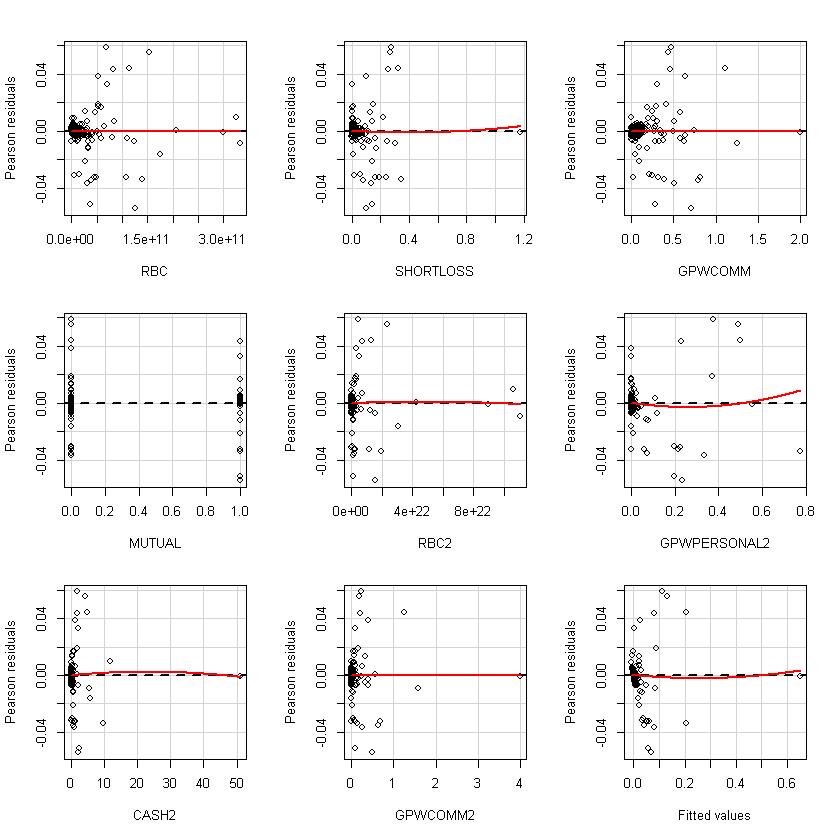

In [271]:
residualPlots(model4a)

<a id="step12"></a>
### Step 12: Validation Analysis

In [247]:
Quant_colnames <- c("RBC","EXPENSES","STAFFWAGE","AGENTWAGE","LONGLOSS",
                    "SHORTLOSS","GPWPERSONAL","GPWCOMM","ASSETS",
                    "CASH","LIQUIDRATIO")
Qual_colnames <- c("COMPANY_NAME","GROUP", "MUTUAL", "STOCK")

NAICDataVal <- dplyr::select(NAICDataVal,c(Quant_colnames, Qual_colnames))

In [275]:
NAICDataVal$EXPENSES2 <- NAICDataVal$EXPENSES^2
NAICDataVal$RBC2 <- NAICDataVal$RBC^2
NAICDataVal$SHORTLOSS2 <- NAICDataVal$SHORTLOSS^2
NAICDataVal$GPWPERSONAL2 <- NAICDataVal$GPWPERSONAL^2
NAICDataVal$CASH2 <- NAICDataVal$CASH^2
NAICDataVal$GPWCOMM2 <- NAICDataVal$GPWCOMM^2

In [276]:
names(NAICDataVal)


[1] "RBC"          "EXPENSES"     "STAFFWAGE"    "AGENTWAGE"    "LONGLOSS"    
 [6] "SHORTLOSS"    "GPWPERSONAL"  "GPWCOMM"      "ASSETS"       "CASH"        
[11] "LIQUIDRATIO"  "COMPANY_NAME" "GROUP"        "MUTUAL"       "STOCK"       
[16] "EXPENSES2"    "RBC2"         "SHORTLOSS2"   "GPWPERSONAL2" "CASH2"       
[21] "GPWCOMM2"

In [279]:
model5 <- lm(formula = EXPENSES2 ~ RBC + SHORTLOSS + GPWCOMM + MUTUAL + 
    RBC2 + GPWPERSONAL2 + CASH2 + GPWCOMM2,data=NAICDataVal[-c(314),-c(2,3,5,9,11,12,18,7,22)])
summary(model5)


Call:
lm(formula = EXPENSES2 ~ RBC + SHORTLOSS + GPWCOMM + MUTUAL + 
    RBC2 + GPWPERSONAL2 + CASH2 + GPWCOMM2, data = NAICDataVal[-c(314), 
    -c(2, 3, 5, 9, 11, 12, 18, 7, 22)])

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0111102 -0.0011736  0.0001289  0.0008603  0.0258167 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -9.713e-04  6.807e-04  -1.427 0.158136    
RBC          -4.551e-14  3.390e-14  -1.343 0.183879    
SHORTLOSS     2.423e-02  2.158e-02   1.122 0.265619    
GPWCOMM       3.262e-02  7.881e-03   4.139 9.83e-05 ***
MUTUAL        4.903e-04  2.228e-03   0.220 0.826476    
RBC2         -2.258e-25  4.156e-26  -5.433 8.08e-07 ***
GPWPERSONAL2  3.561e-02  2.409e-02   1.478 0.143947    
CASH2         1.159e-02  6.886e-04  16.827  < 2e-16 ***
GPWCOMM2     -3.588e-02  8.987e-03  -3.993 0.000163 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.004292 on 68 degrees of

,Test stat,Pr(>|t|)
RBC,-3.352,0.001
SHORTLOSS,1.465,0.147
GPWCOMM,-0.284,0.778
MUTUAL,-0.621,0.537
RBC2,0.760,0.450
GPWPERSONAL2,-2.974,0.004
CASH2,0.746,0.458
GPWCOMM2,-0.643,0.523
Tukey test,0.176,0.860


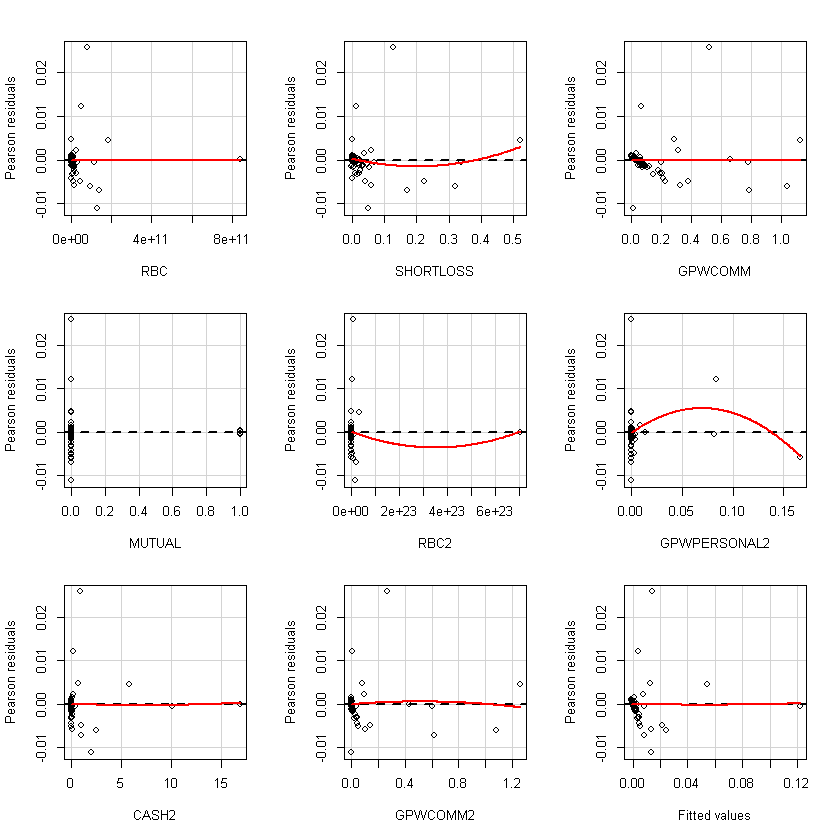

In [280]:
residualPlots(model5)

<a id="step13"></a>
### Step 13: Model on Full Data

In [282]:
Quant_colnames <- c("RBC","EXPENSES","STAFFWAGE","AGENTWAGE","LONGLOSS",
                    "SHORTLOSS","GPWPERSONAL","GPWCOMM","ASSETS",
                    "CASH","LIQUIDRATIO")
Qual_colnames <- c("COMPANY_NAME","GROUP", "MUTUAL", "STOCK")

NAICDataFull <- dplyr::select(NAICDataFull,c(Quant_colnames, Qual_colnames))


NAICDataFull$EXPENSES2 <- NAICDataFull$EXPENSES^2
NAICDataFull$RBC2 <- NAICDataFull$RBC^2
NAICDataFull$SHORTLOSS2 <- NAICDataFull$SHORTLOSS^2
NAICDataFull$GPWPERSONAL2 <- NAICDataFull$GPWPERSONAL^2
NAICDataFull$CASH2 <- NAICDataFull$CASH^2
NAICDataFull$GPWCOMM2 <- NAICDataFull$GPWCOMM^2

In [283]:
model6 <- lm(formula = EXPENSES2 ~ RBC + SHORTLOSS + GPWCOMM + MUTUAL + 
    RBC2 + GPWPERSONAL2 + CASH2 + GPWCOMM2,data=NAICDataFull[-c(314),-c(2,3,5,9,11,12,18,7,22)])
summary(model6)


Call:
lm(formula = EXPENSES2 ~ RBC + SHORTLOSS + GPWCOMM + MUTUAL + 
    RBC2 + GPWPERSONAL2 + CASH2 + GPWCOMM2, data = NAICDataFull[-c(314), 
    -c(2, 3, 5, 9, 11, 12, 18, 7, 22)])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38162  0.00003  0.00057  0.00198  0.45430 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.941e-06  2.310e-03  -0.001 0.998985    
RBC          -4.507e-14  1.446e-13  -0.312 0.755399    
SHORTLOSS     1.472e-01  4.365e-02   3.373 0.000822 ***
GPWCOMM      -5.852e-02  2.075e-02  -2.820 0.005063 ** 
MUTUAL       -1.055e-03  4.689e-03  -0.225 0.822034    
RBC2          5.471e-25  3.737e-25   1.464 0.144042    
GPWPERSONAL2  2.006e-01  1.237e-02  16.222  < 2e-16 ***
CASH2         2.914e-03  4.388e-04   6.641 1.10e-10 ***
GPWCOMM2      6.550e-02  7.932e-03   8.258 2.59e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03572 on 374 degrees of freedom
Multiple R

,Test stat,Pr(>|t|)
RBC,0.663,0.508
SHORTLOSS,1.800,0.073
GPWCOMM,-1.380,0.168
MUTUAL,0.023,0.982
RBC2,-7.924,0.000
GPWPERSONAL2,-5.506,0.000
CASH2,6.004,0.000
GPWCOMM2,-9.834,0.000
Tukey test,10.384,0.000


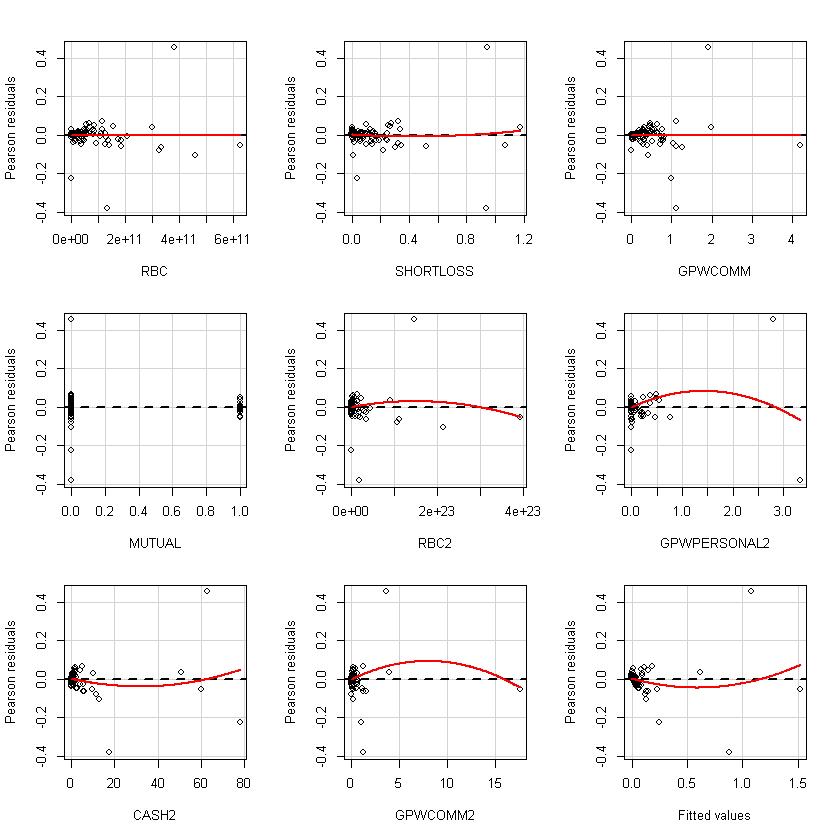

In [284]:
residualPlots(model6)

In [288]:
names(NAICDataFull)
model6a <- lm(formula = EXPENSES2 ~ RBC + SHORTLOSS + GPWCOMM + MUTUAL + 
    RBC2 + GPWPERSONAL + GPWPERSONAL2 + CASH2 + GPWCOMM2,data=NAICDataFull[-c(314),-c(2,3,5,9,11,12,18,22)])
summary(model6a)


[1] "RBC"          "EXPENSES"     "STAFFWAGE"    "AGENTWAGE"    "LONGLOSS"    
 [6] "SHORTLOSS"    "GPWPERSONAL"  "GPWCOMM"      "ASSETS"       "CASH"        
[11] "LIQUIDRATIO"  "COMPANY_NAME" "GROUP"        "MUTUAL"       "STOCK"       
[16] "EXPENSES2"    "RBC2"         "SHORTLOSS2"   "GPWPERSONAL2" "CASH2"       
[21] "GPWCOMM2"


Call:
lm(formula = EXPENSES2 ~ RBC + SHORTLOSS + GPWCOMM + MUTUAL + 
    RBC2 + GPWPERSONAL + GPWPERSONAL2 + CASH2 + GPWCOMM2, data = NAICDataFull[-c(314), 
    -c(2, 3, 5, 9, 11, 12, 18, 22)])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37740  0.00012  0.00064  0.00216  0.45606 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.247e-04  2.323e-03  -0.054  0.95723    
RBC          -5.324e-14  1.455e-13  -0.366  0.71466    
SHORTLOSS     1.442e-01  4.406e-02   3.273  0.00116 ** 
GPWCOMM      -5.961e-02  2.087e-02  -2.856  0.00454 ** 
MUTUAL       -1.384e-03  4.734e-03  -0.292  0.77023    
RBC2          5.684e-25  3.762e-25   1.511  0.13164    
GPWPERSONAL   1.412e-02  2.651e-02   0.533  0.59456    
GPWPERSONAL2  1.930e-01  1.895e-02  10.187  < 2e-16 ***
CASH2         2.939e-03  4.417e-04   6.653 1.02e-10 ***
GPWCOMM2      6.537e-02  7.943e-03   8.230 3.17e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Re

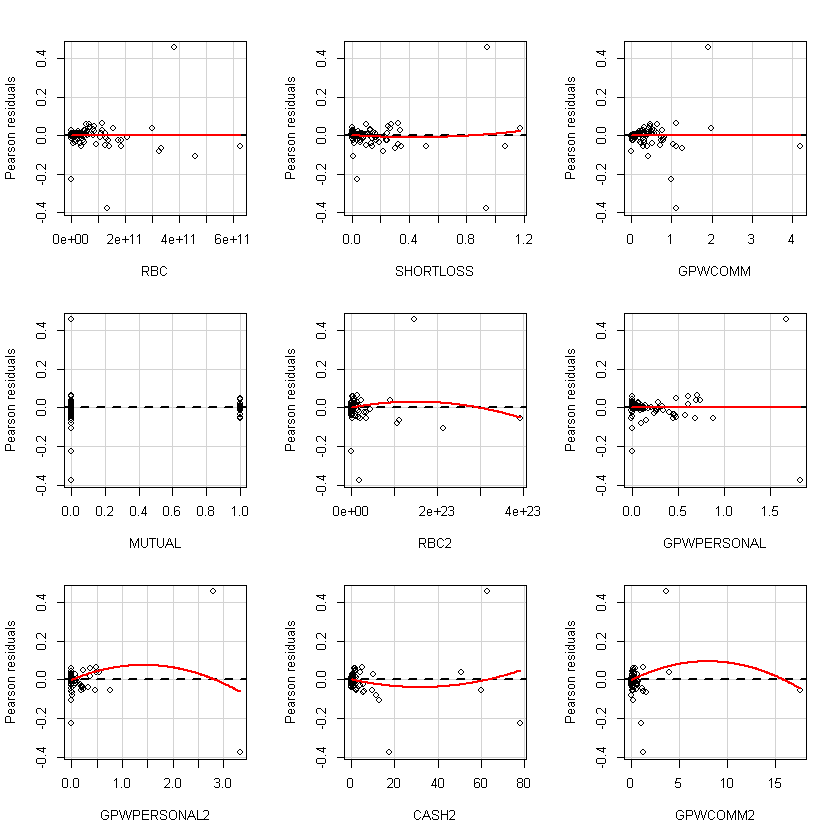

,Test stat,Pr(>|t|)
RBC,0.583,0.560
SHORTLOSS,2.021,0.044
GPWCOMM,-0.735,0.463
MUTUAL,0.037,0.971
RBC2,-8.299,0.000
GPWPERSONAL,-1.128,0.260
GPWPERSONAL2,-9.911,0.000
CASH2,6.011,0.000
GPWCOMM2,-10.503,0.000
Tukey test,13.216,0.000


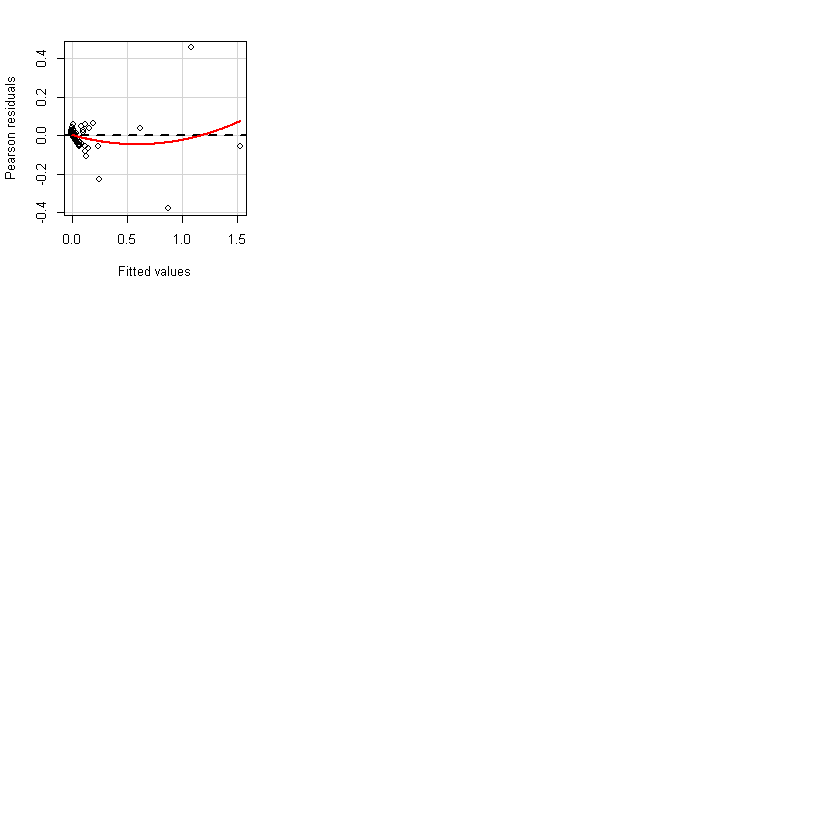

In [289]:
residualPlots(model6a)

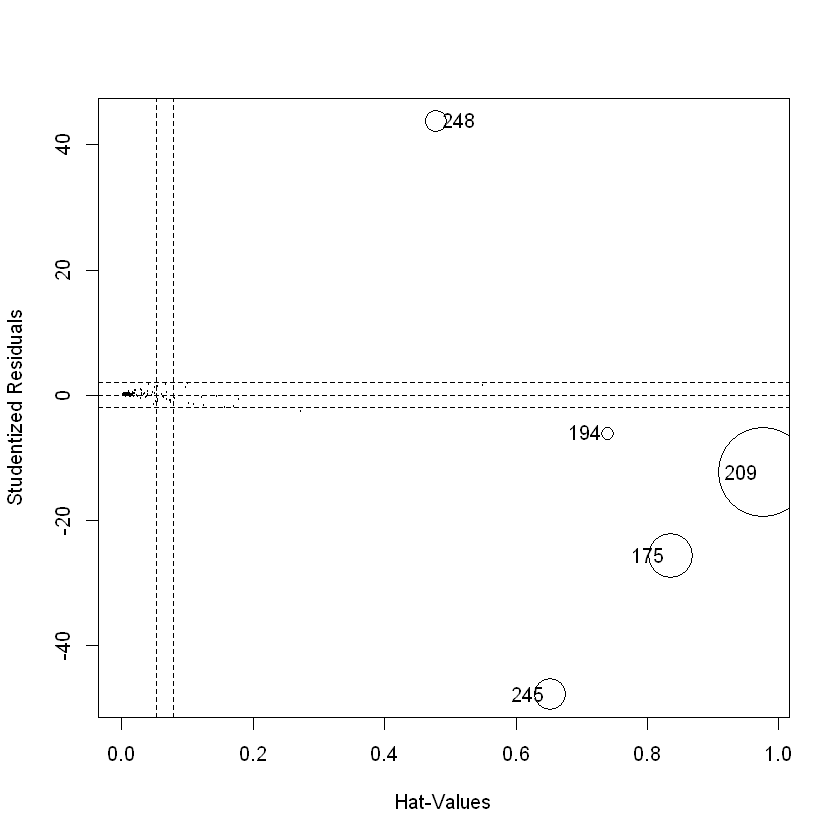

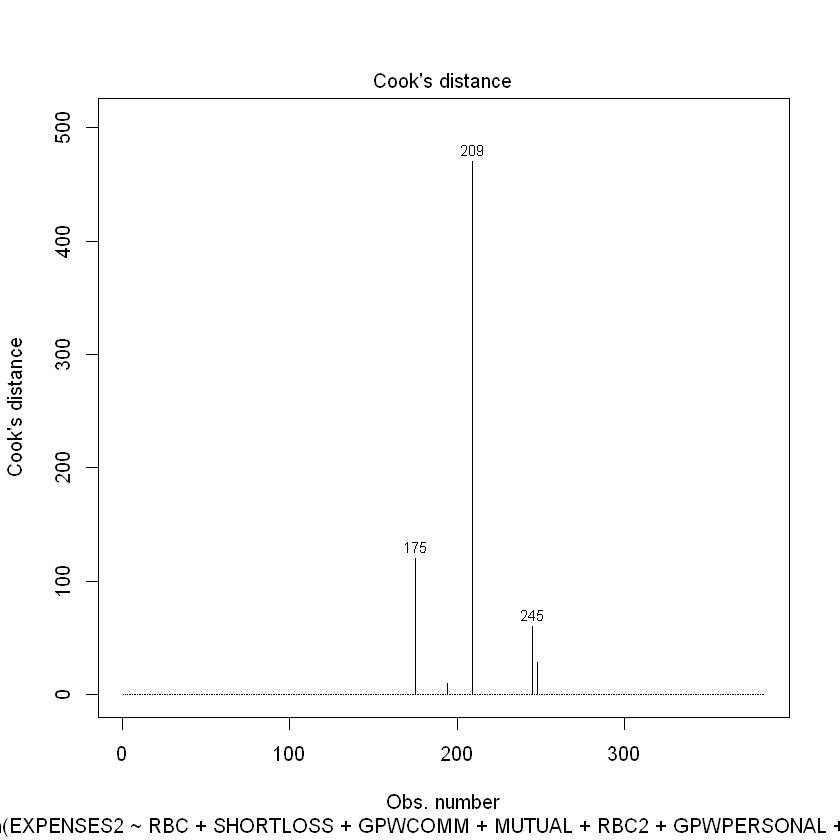

In [290]:
DeletionDiagonsitics(model6a,0.05)

In [297]:
names(NAICDataFull)
model6a <- lm(formula = EXPENSES2 ~ RBC + SHORTLOSS + GPWCOMM + MUTUAL + 
    RBC2 + GPWPERSONAL + GPWPERSONAL2 + CASH2 + GPWCOMM2,data=NAICDataFull[-c(248,194,175,209,245,314),-c(2,3,5,9,11,12,18,22)])
summary(model6a)

[1] "RBC"          "EXPENSES"     "STAFFWAGE"    "AGENTWAGE"    "LONGLOSS"    
 [6] "SHORTLOSS"    "GPWPERSONAL"  "GPWCOMM"      "ASSETS"       "CASH"        
[11] "LIQUIDRATIO"  "COMPANY_NAME" "GROUP"        "MUTUAL"       "STOCK"       
[16] "EXPENSES2"    "RBC2"         "SHORTLOSS2"   "GPWPERSONAL2" "CASH2"       
[21] "GPWCOMM2"


Call:
lm(formula = EXPENSES2 ~ RBC + SHORTLOSS + GPWCOMM + MUTUAL + 
    RBC2 + GPWPERSONAL + GPWPERSONAL2 + CASH2 + GPWCOMM2, data = NAICDataFull[-c(248, 
    194, 175, 209, 245, 314), -c(2, 3, 5, 9, 11, 12, 18, 22)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.062218 -0.000737 -0.000239  0.001213  0.066301 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.486e-04  7.366e-04   1.016  0.31011    
RBC           2.135e-14  5.323e-14   0.401  0.68863    
SHORTLOSS     7.839e-02  1.904e-02   4.118 4.72e-05 ***
GPWCOMM      -2.297e-02  1.038e-02  -2.213  0.02751 *  
MUTUAL       -1.967e-03  1.414e-03  -1.391  0.16516    
RBC2         -5.687e-25  1.833e-25  -3.103  0.00206 ** 
GPWPERSONAL  -4.028e-02  1.427e-02  -2.823  0.00502 ** 
GPWPERSONAL2  2.520e-01  2.309e-02  10.913  < 2e-16 ***
CASH2         6.132e-03  5.867e-04  10.451  < 2e-16 ***
GPWCOMM2      5.448e-02  9.555e-03   5.702 2.44e-08 ***
---
Signif. codes:  0 '***' 0.001 '

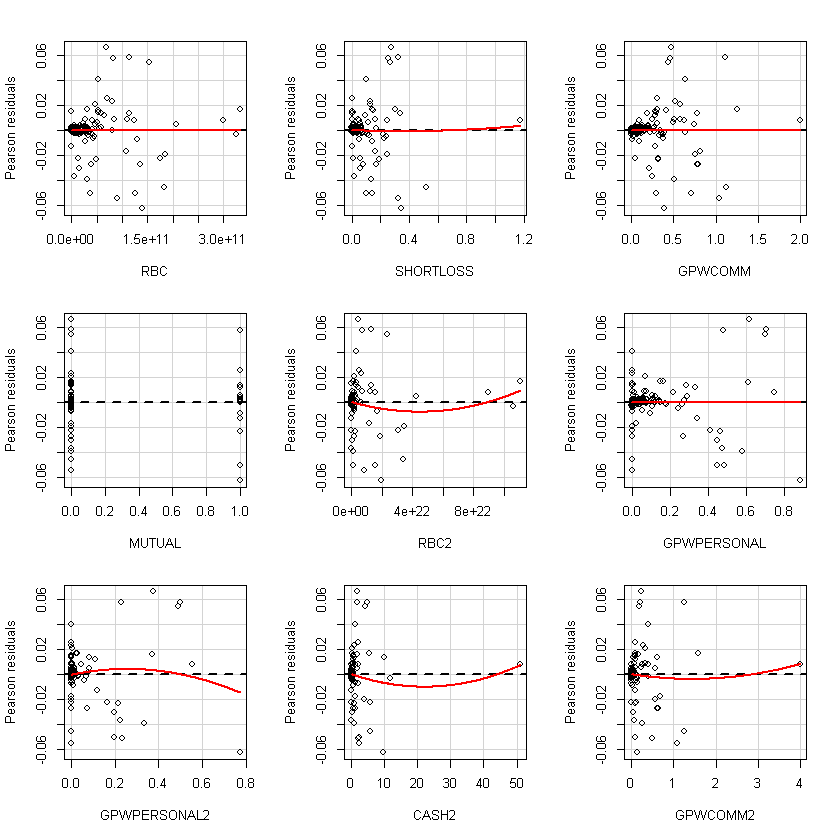

,Test stat,Pr(>|t|)
RBC,0.154,0.878
SHORTLOSS,1.816,0.070
GPWCOMM,0.805,0.422
MUTUAL,-0.392,0.695
RBC2,4.477,0.000
GPWPERSONAL,0.156,0.876
GPWPERSONAL2,-3.145,0.002
CASH2,3.228,0.001
GPWCOMM2,3.817,0.000
Tukey test,3.574,0.000


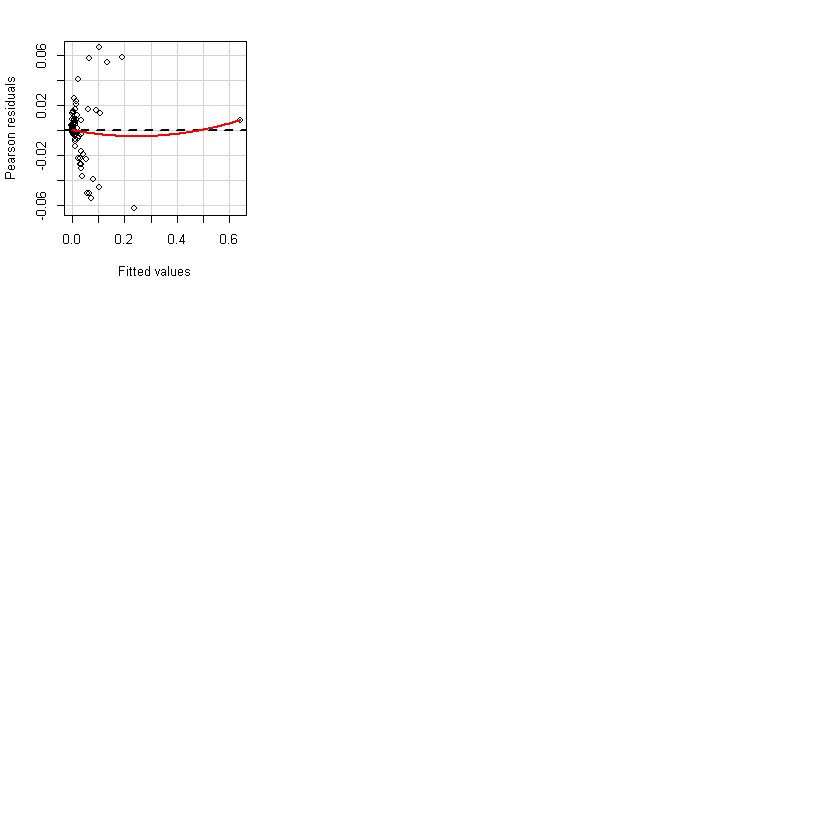

In [298]:
residualPlots(model6a)